In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## users with primary genre fiction, what is the average number of books read by them
book_list = pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unscrape_books/users_2000_book_limit5_details.csv')

def replace_non_string(x):
    if type(x)==str:
        return x
    else:
        return ""
    
def get_genre1(x):
    try:
        return(x.split(';')[0])
    except:
        return x

# book_list['genre']=book_list['genre'].apply(replace_non_string)
book_list['Old_genre']=book_list['genre'].apply(get_genre1)
old_new_genres=pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unique_genres_reduced_set_JE.csv')   
old_new_genres=old_new_genres.dropna()
book_list_new_genre=book_list.join(old_new_genres.set_index('Old_genre'), on='Old_genre')

In [66]:
# remove non fiction books
book_list_new_genre=book_list_new_genre.dropna()
book_list_new_genre=book_list_new_genre[book_list_new_genre['New_genre']!='Nonfiction']

array(['Literary Fiction', 'Fantasy', 'YA', 'Horror Suspense', 'Fiction',
       'Mystery Crime Detective', 'Graphic Novels', 'Historical Fiction',
       'Childrens', 'Science Fiction', 'Womens Fiction', 'Romance',
       'Thriller', 'Erotic Fiction'], dtype=object)

In [80]:
# find percent of fiction books read by each user
fiction_count=book_list_new_genre.groupby(['user_id', 'New_genre']).agg('count').reset_index()
user_fiction_count=fiction_count[fiction_count['New_genre']=='Fiction'].reset_index()[['user_id','book_id']].rename(columns={'book_id':'fiction_cnt'})
user_total_count=book_list_new_genre.groupby(['user_id']).agg('count').reset_index()[['user_id','book_id']].rename(columns={'book_id':'total_cnt'})

In [181]:
book_list_new_genre

,user_id,book_id,user_rating,avg_rating,book_title,author,rating,review,genre,Old_genre,New_genre
0,2636606,26158710,3,3.76,Funny Girl,Betsy Bird,388.0,104,Short Stories; Childrens; Middle Grade; Humor;...,Short Stories,Literary Fiction
1,2636606,32849250,3,3.80,Weregirl,C.D. Bell,505.0,158,Fantasy; Young Adult; Shapeshifters; Werewolve...,Fantasy,Fantasy
2,2636606,35504431,3,4.22,Turtles All the Way Down,John Green,42127.0,8260,Young Adult; Contemporary; Fiction,Young Adult,YA
3,2636606,34219873,3,4.52,Nevermoor: The Trials of Morrigan Crow (Neverm...,Jessica Townsend;Nevermoor: The Trials of Morr...,1357.0,443,Fantasy; Childrens; Middle Grade; Young Adult;...,Fantasy,Fantasy
4,2636606,17165898,3,3.47,Heaven Is Paved with Oreos (Dairy Queen #)4),Catherine Gilbert Murdock;Heaven Is Paved with...,768.0,197,Young Adult; Childrens; Middle Grade; Realisti...,Young Adult,YA
5,2636606,29749085,3,4.16,Wonder Woman: Warbringer (DC Icons #)1),Leigh Bardugo,7888.0,2140,Fantasy; Young Adult; Comics; Superheroes,Fantasy,Fantasy
6,2636606,33918889,4,3.85,Alone,Cyn Balog;Alone,127.0,94,Horror; Young Adult; Mystery,Horror,Horror Suspense
7,2636606,32498122,3,3.95,The Identicals,Elin Hilderbrand,20553.0,1773,Fiction; Womens Fiction; Chick Lit; Contemporary,Fiction,Fiction
8,2636606,6281385,3,3.85,The Case of the Case of Mistaken Identity (The...,Mac Barnett;Adam Rex,2524.0,367,Mystery; Humor; Adventure; Childrens; Fiction;...,Mystery,Mystery Crime Detective
9,2636606,27431021,3,4.25,The Bad Guys: Episode 2: Mission Unpluckable (...,Aaron Blabey;The Bad Guys: Episode 2: Mission ...,596.0,101,Sequential Art; Graphic Novels; Humor; Childre...,Sequential Art,Graphic Novels


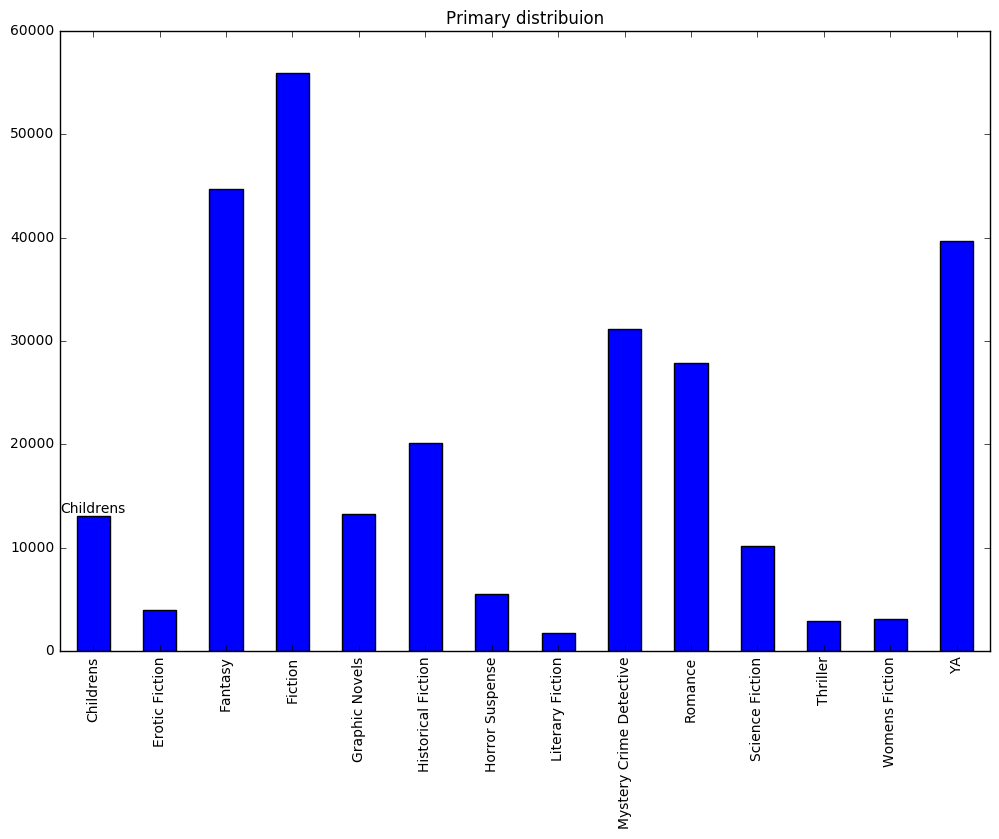

In [95]:
#Distribution of primary genre across different users
primary_dist=book_list_new_genre.groupby(['New_genre']).agg('count').reset_index().rename(columns={'user_id':'count'})[['New_genre','count']]
freq_series=primary_dist['count']
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Primary distribuion')
ax.set_xticklabels(list(primary_dist['New_genre']))
rects = ax.patches
labels=list(primary_dist['New_genre'])
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

In [114]:
old_new_genres

,Old_genre,New_genre
0,Childrens,Childrens
1,Middle Grade,Childrens
2,Picture Books,Childrens
3,Chapter Books,Childrens
4,Fairy Tales,Childrens
5,Childrens,Childrens
6,Christian Fiction,Christian Fiction
7,Christian,Christian Fiction
8,Angels,Christian Fiction
9,Lds Fiction,Christian Fiction


In [5]:
# important primary-secondary combinations
def get_genre2(x):
    try:
        return(x.split(';')[1])
    except:
        return x
    
def get_genre3(x):
    try:
        return(x.split(';')[2])
    except:
        return x

def get_genre4(x):
    try:
        return(x.split(';')[3])
    except:
        return x
    
def get_genre5(x):
    try:
        return(x.split(';')[4])
    except:
        return x
    
def get_genre6(x):
    try:
        return(x.split(';')[5])
    except:
        return x
    
book_list_2genres=pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unscrape_books/users_2000_book_limit5_details.csv')
book_list_2genres['Old_genre1']=book_list_2genres['genre'].apply(get_genre1)
book_list_2genres['Old_genre2']=book_list_2genres['genre'].apply(get_genre2)
book_list_2genres['Old_genre3']=book_list_2genres['genre'].apply(get_genre3)
book_list_2genres['Old_genre4']=book_list_2genres['genre'].apply(get_genre4)
book_list_2genres['Old_genre5']=book_list_2genres['genre'].apply(get_genre5)
book_list_2genres['Old_genre6']=book_list_2genres['genre'].apply(get_genre6)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre1':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre1'})
book_list_2genres=book_list_2genres.drop(labels=['Old_genre'],axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre2':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre2'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre3':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre3'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre4':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre4'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre5':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre5'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre6':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre6'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.groupby(['New_genre1','New_genre2']).agg('count').reset_index().sort_values(by='user_id',ascending=False)
book_list_2genres

,New_genre1,New_genre2,user_id,book_id,user_rating,avg_rating,book_title,author,rating,review,genre,New_genre3,New_genre4,New_genre5,New_genre6
56,Historical Fiction,Historical Fiction,20055,20055,20055,20055,20055,20055,20055,20055,20055,19992,19488,16162,13049
107,Nonfiction,Nonfiction,19248,19248,19248,19248,19248,19248,19248,19248,19248,18184,17048,14658,10441
34,Fantasy,YA,18639,18639,18639,18639,18639,18639,18639,18639,18639,18297,13453,11257,7246
85,Mystery Crime Detective,Fiction,16243,16243,16243,16243,16243,16243,16243,16243,16243,15985,13248,12285,6656
54,Graphic Novels,Graphic Novels,13292,13292,13292,13292,13292,13292,13292,13292,13292,13166,13083,11986,11465
20,Fantasy,Fantasy,12924,12924,12924,12924,12924,12924,12924,12924,12924,12366,12606,12174,11934
122,Romance,Romance,12557,12557,12557,12557,12557,12557,12557,12557,12557,12505,12377,10940,8351
154,YA,Fiction,12407,12407,12407,12407,12407,12407,12407,12407,12407,12332,10838,7335,4615
0,Childrens,Childrens,10300,10300,10300,10300,10300,10300,10300,10300,10300,10232,8385,5773,3950
41,Fiction,Historical Fiction,9834,9834,9834,9834,9834,9834,9834,9834,9834,9827,9432,6173,5186


In [6]:
# important primary-secondary pairs where secondary is different than primary
def new_secondary_genre(x):
    try:
        i=0
#         print(x[0])
        while x[i]=='Fiction':
            i+=1
        return x[i]
    except:
        return x[0]

book_list_2genres=pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unscrape_books/users_2000_book_limit5_details.csv')
book_list_2genres['Old_genre1']=book_list_2genres['genre'].apply(get_genre1)
book_list_2genres['Old_genre2']=book_list_2genres['genre'].apply(get_genre2)
book_list_2genres['Old_genre3']=book_list_2genres['genre'].apply(get_genre3)
book_list_2genres['Old_genre4']=book_list_2genres['genre'].apply(get_genre4)
book_list_2genres['Old_genre5']=book_list_2genres['genre'].apply(get_genre5)
book_list_2genres['Old_genre6']=book_list_2genres['genre'].apply(get_genre6)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre1':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre1'})
book_list_2genres=book_list_2genres.drop(labels=['Old_genre'],axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre2':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre2'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre3':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre3'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre4':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre4'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre5':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre5'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres=book_list_2genres.rename(columns={'Old_genre6':'Old_genre'})
book_list_2genres=book_list_2genres.join(old_new_genres.set_index('Old_genre'), on='Old_genre')
book_list_2genres=book_list_2genres.rename(columns={'New_genre':'New_genre6'})
book_list_2genres=book_list_2genres.drop(labels='Old_genre',axis=1)

book_list_2genres['New_genre']=book_list_2genres[['New_genre1','New_genre2','New_genre3','New_genre4','New_genre5','New_genre6']].apply(new_secondary_genre,axis=1)

In [7]:
book_list_2genres_temp=book_list_2genres
book_list_2genres_temp

,user_id,book_id,user_rating,avg_rating,book_title,author,rating,review,genre,New_genre1,New_genre2,New_genre3,New_genre4,New_genre5,New_genre6,New_genre
0,2636606,26158710,3,3.76,Funny Girl,Betsy Bird,388.0,104,Short Stories; Childrens; Middle Grade; Humor;...,Literary Fiction,Childrens,Childrens,Nonfiction,Nonfiction,NaN,Literary Fiction
1,2636606,32849250,3,3.80,Weregirl,C.D. Bell,505.0,158,Fantasy; Young Adult; Shapeshifters; Werewolve...,Fantasy,YA,Fantasy,Horror Suspense,Fantasy,Fantasy,Fantasy
2,2636606,35504431,3,4.22,Turtles All the Way Down,John Green,42127.0,8260,Young Adult; Contemporary; Fiction,YA,Fiction,Fiction,NaN,NaN,NaN,YA
3,2636606,34219873,3,4.52,Nevermoor: The Trials of Morrigan Crow (Neverm...,Jessica Townsend;Nevermoor: The Trials of Morr...,1357.0,443,Fantasy; Childrens; Middle Grade; Young Adult;...,Fantasy,Childrens,Childrens,YA,Childrens,Fantasy,Fantasy
4,2636606,17165898,3,3.47,Heaven Is Paved with Oreos (Dairy Queen #)4),Catherine Gilbert Murdock;Heaven Is Paved with...,768.0,197,Young Adult; Childrens; Middle Grade; Realisti...,YA,Childrens,Childrens,Fiction,Romance,Fiction,YA
5,2636606,29749085,3,4.16,Wonder Woman: Warbringer (DC Icons #)1),Leigh Bardugo,7888.0,2140,Fantasy; Young Adult; Comics; Superheroes,Fantasy,YA,Graphic Novels,NaN,NaN,NaN,Fantasy
6,2636606,33918889,4,3.85,Alone,Cyn Balog;Alone,127.0,94,Horror; Young Adult; Mystery,Horror Suspense,YA,Mystery Crime Detective,NaN,NaN,NaN,Horror Suspense
7,2636606,32498122,3,3.95,The Identicals,Elin Hilderbrand,20553.0,1773,Fiction; Womens Fiction; Chick Lit; Contemporary,Fiction,Womens Fiction,Womens Fiction,Fiction,NaN,NaN,Womens Fiction
8,2636606,6281385,3,3.85,The Case of the Case of Mistaken Identity (The...,Mac Barnett;Adam Rex,2524.0,367,Mystery; Humor; Adventure; Childrens; Fiction;...,Mystery Crime Detective,Nonfiction,Nonfiction,Childrens,Fiction,Childrens,Mystery Crime Detective
9,2636606,27431021,3,4.25,The Bad Guys: Episode 2: Mission Unpluckable (...,Aaron Blabey;The Bad Guys: Episode 2: Mission ...,596.0,101,Sequential Art; Graphic Novels; Humor; Childre...,Graphic Novels,Graphic Novels,Nonfiction,Childrens,Childrens,Childrens,Graphic Novels


In [30]:
#primary count
book_list_2genres_temp_pri=book_list_2genres_temp.groupby(['user_id','New_genre']).agg('count').reset_index()[['user_id','New_genre','book_id']]
book_list_2genres_temp_pri=book_list_2genres_temp_pri[book_list_2genres_temp_pri.groupby(['user_id'])['book_id'].transform(max)==book_list_2genres_temp_pri['book_id']]
book_list_2genres_temp_pri=book_list_2genres_temp_pri.reset_index()[['user_id','New_genre','book_id']]
book_list_2genres_temp_pri[book_list_2genres_temp_pri.groupby(['user_id'])['book_id'].transform(max)==book_list_2genres_temp_pri['book_id']]

,user_id,New_genre,book_id
8,5231,Nonfiction,61
15,9545,Fantasy,51
33,13699,Nonfiction,74
44,15411,Mystery Crime Detective,123
53,21659,Fantasy,97
71,27435,Nonfiction,81
91,27539,YA,67
100,31186,Nonfiction,26
106,31879,Fantasy,63
123,32014,Mystery Crime Detective,48


In [17]:
## total count
book_list_2genres_temp_tot=book_list_2genres_temp.groupby(['user_id']).agg('count').reset_index()[['user_id','book_id']]
book_list_2genres_temp_tot_1=book_list_2genres_temp_tot.rename(columns={'book_id':'total_count'})
book_list_2genres_temp_tot_1
final_tab=book_list_2genres_temp_pri.join(book_list_2genres_temp_tot_1.set_index('user_id'),on='user_id')

,user_id,New_genre,book_id,total_count
0,5231,Nonfiction,61,237
1,9545,Fantasy,51,156
2,13699,Nonfiction,74,269
3,15411,Mystery Crime Detective,123,438
4,21659,Fantasy,97,449
5,27435,Nonfiction,81,481
6,27539,YA,67,262
7,31186,Nonfiction,26,116
8,31879,Fantasy,63,212
9,32014,Mystery Crime Detective,48,204


In [24]:
def percent(x):
    return ((1.0*x[0])/x[1])*100.0
final_tab=book_list_2genres_temp_pri.join(book_list_2genres_temp_tot_1.set_index('user_id'),on='user_id')
final_tab['percent']=final_tab[['book_id','total_count']].apply(percent,axis=1)
final_tab.groupby('New_genre').agg('count').reset_index()[['New_genre','total_count']]

,New_genre,total_count
0,Childrens,81
1,Christian Fiction,1
2,Fantasy,307
3,Graphic Novels,96
4,Historical Fiction,163
5,Horror Suspense,9
6,Literary Fiction,32
7,Mystery Crime Detective,296
8,Nonfiction,247
9,Romance,222


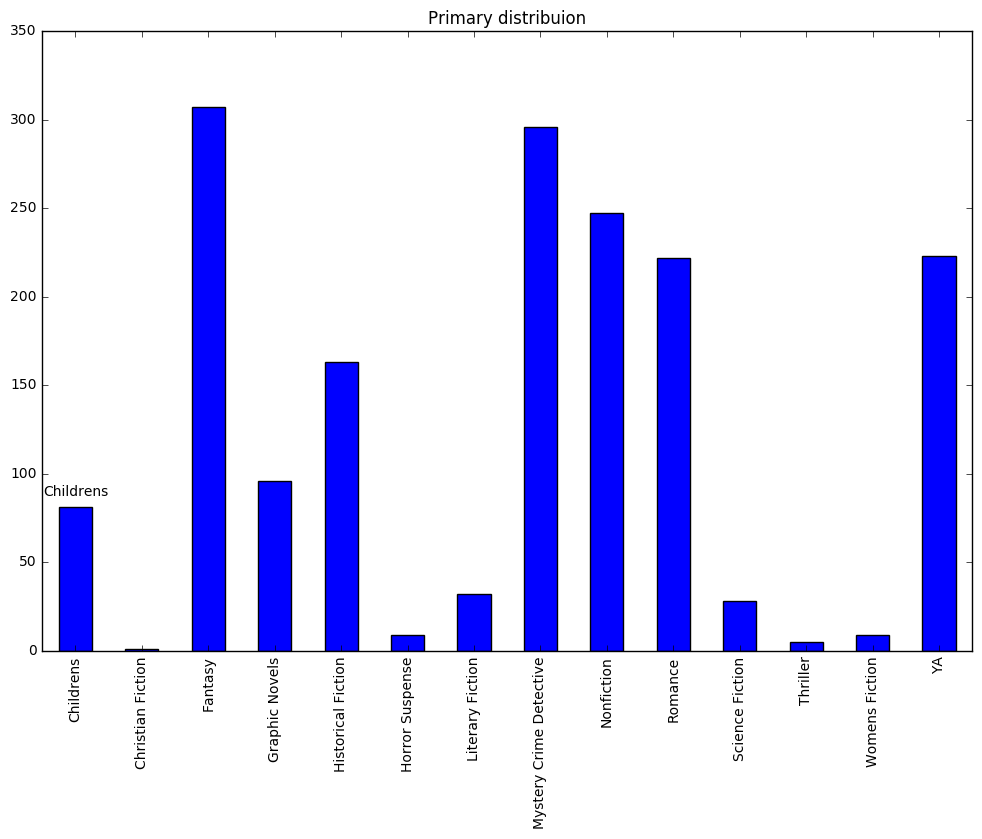

In [26]:
#primary distribution of users with nonfiction included
primary_dist=final_tab.groupby('New_genre').agg('count').reset_index()[['New_genre','total_count']]
freq_series=primary_dist['total_count']
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Primary distribuion')
ax.set_xticklabels(list(primary_dist['New_genre']))
rects = ax.patches
labels=list(primary_dist['New_genre'])
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

In [ ]:
#primary distribution of users with nonfiction replaced with next biggest genre